In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os 
current_dir = os.getcwd()
import image_functions as image_func
import mpl_config

/Users/meinlaptop/Desktop/Studium/2025_SoSe/masters-thesis-code/Python/image_functions.py:258: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.75)


std = (7.34 +- 0.16)nT
SNR = 23.97 +- 0.54
SNR fit ROI = 23.64 +- 0.54


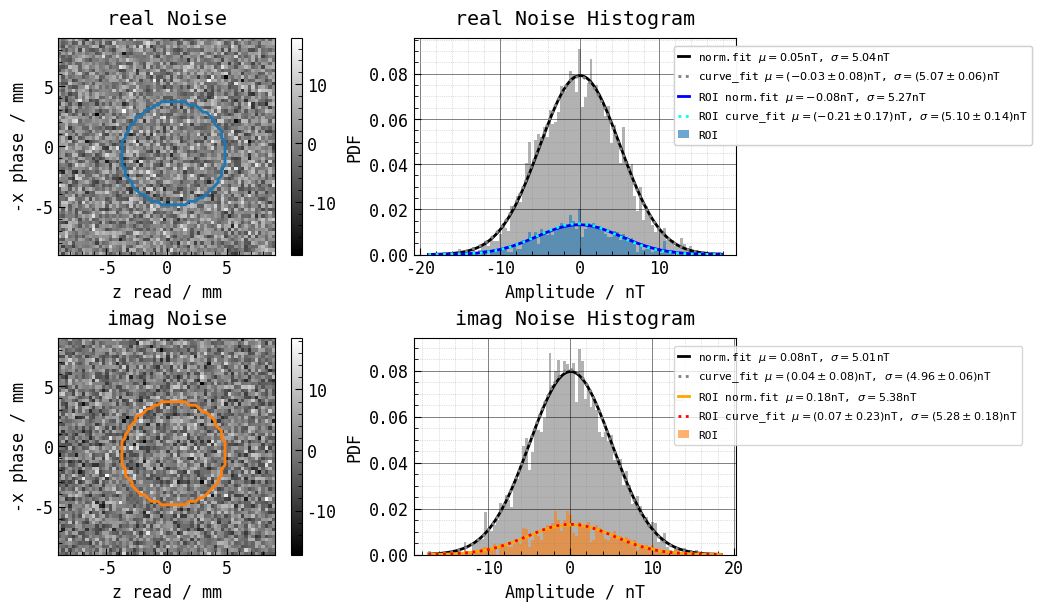

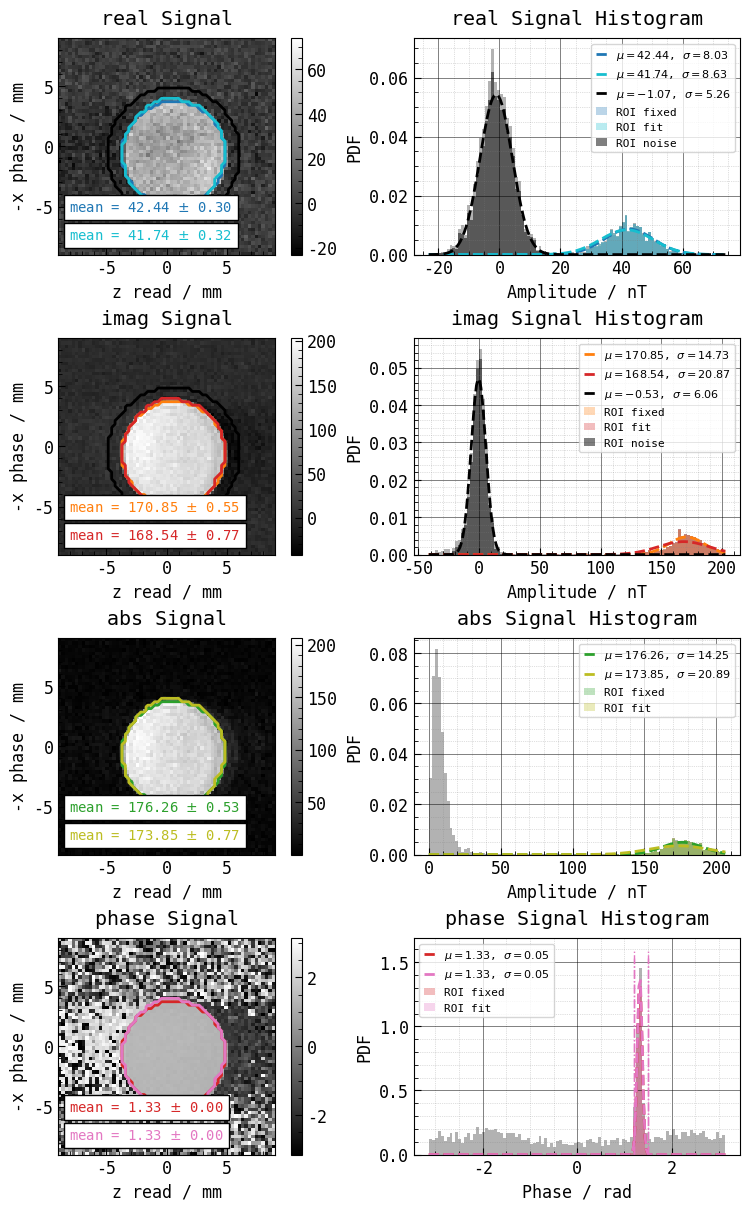

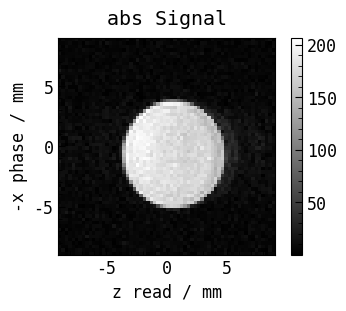

In [ ]:
signal_fname        = 'commercial_15mm_1H_10mm_NaCl_CuSO4_avg_1_Signal_Image.csv'
noise_fname         = 'commercial_15mm_1H_10mm_NaCl_CuSO4_avg_1_Noise_Image.csv'

# save_path           = os.path.join(current_dir, '..', 'thesis', 'figures', 'imaging', 'commercial_15mm')
# prefix              = 'commercial_15mm_NaCl_CuSO4_'
# save_fname_noise    = '/' + prefix + 'noise'
# save_fname_eval     = '/' + prefix + 'eval'
# save_fname_image    = '/' + prefix + 'abs_image'
signal_data         = image_func.load_data(signal_fname)
noise_data          = image_func.load_data(noise_fname)

# scaling factor for FOV of gammaX image when performing dual nuclear imaging
# order of numerator and denominator depends on what nuclei is used for gammaDef  

gamma_23Na = 7.0761
gamma_1H = 26.752
scaling_factor = gamma_1H / gamma_23Na 

# image parameters to convert pixel in mm
image_params = [
    64, # nread
    64, # nphase
    18, # * scaling_factor, # FOVread in mm
    18  # * scaling_factor  # FOVphase in mm
]

ROI_fix_params = [4.3, [.6,-.6]]
# for ring ROI
# ROI_fix_params = [[2.7,4.5], [.6,-.6]]

# corresponds to noise ROI in image_eval()
ROI_noise_params = [5.5, [.6,-.6]]

# sigma default = .4
ROI_fit_params = [1.2, 1.5, .4]

noise = image_func.get_noise(noise_data, image_params, ROI_fix_params)
# plt.savefig(save_path  + save_fname_noise + '.pdf', bbox_inches='tight')
signal = image_func.image_eval(signal_data, image_params, ROI_fix_params, ROI_fit_params, ROI_noise_params, fit=True)
# plt.savefig(save_path  + save_fname_eval + '.pdf', bbox_inches='tight')
image_func.abs_image(signal_data, image_params)
# plt.savefig(save_path  + save_fname_image + '.pdf', bbox_inches='tight')

# SNR eval for fixed ROI with external noise measurement
N = noise[3][2]         # noise 
uN = noise[3][3]        # uncertainty of noise
S = signal[1][0]        # mean signal amplitude
uS = signal[2][0]       # standard error of the mean
SNR = S / N             # SNR
# uncertainty propagation
uSNR = np.sqrt((uS/N)**2+(-S*uN/N**2)**2)

# for fit ROI
N_f = noise[3][2]         # noise 
uN_f = noise[3][3]        # uncertainty of noise
S_f = signal[1][1]        # mean signal amplitude
uS_f = signal[2][1]       # standard error of the m
SNR_f = S_f / N_f         # SNR
# uncertainty propagation
uSNR_f = np.sqrt((uS_f/N_f)**2+(-S_f*uN_f/N_f**2)**2)

print(f'SNR = {SNR:.2f} +- {uSNR:.2f}')
print(f'SNR fit ROI = {SNR_f:.2f} +- {uSNR_f:.2f}')


SNR:  [2.13493565 2.02877739]


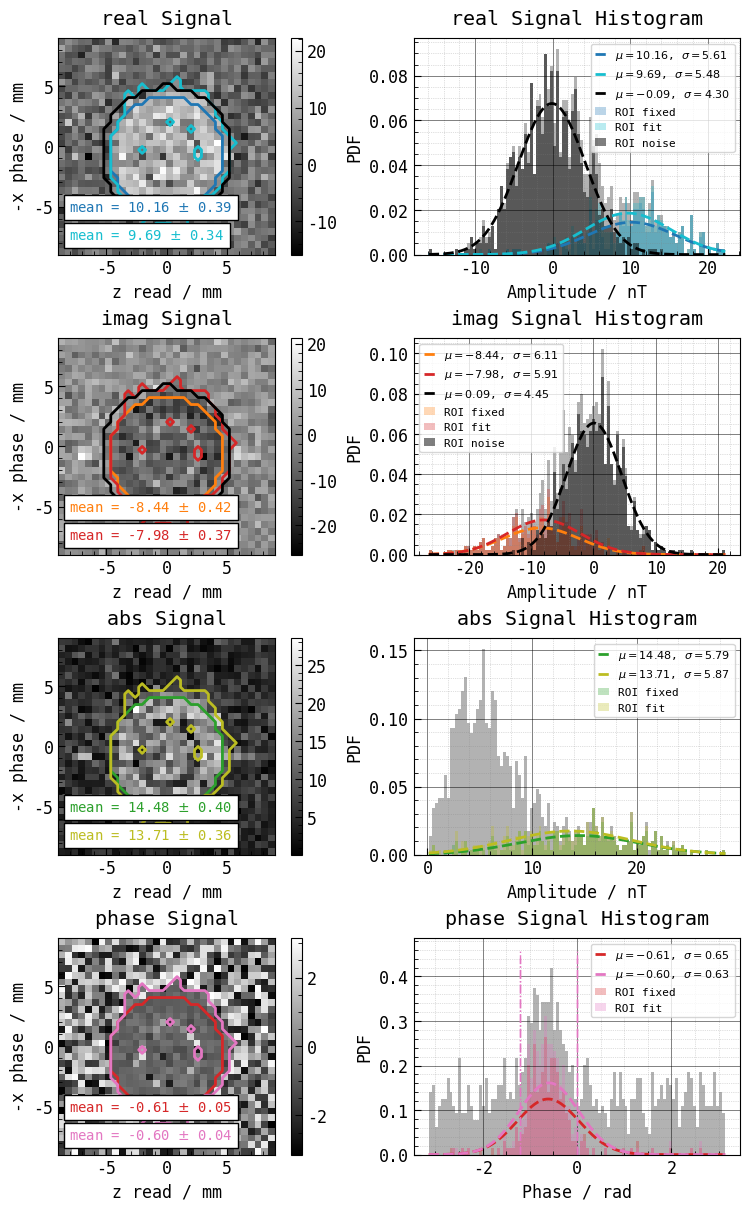

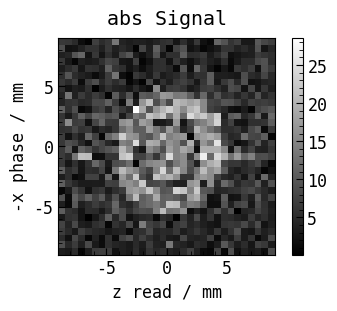

In [8]:
# if no noise measurement
signal_fname        = 'double_res_23Na_tube_avg_10_Signal_Image.csv'

# save_path           = os.path.join(current_dir, '..', 'thesis', 'figures', 'imaging', 'custom_double_res')
# prefix              = 'double_res_23Na_tube_'

# save_fname_eval     = '/' + prefix + 'eval'
# save_fname_image    = '/' + prefix + 'abs_image'

signal_data         = image_func.load_data(signal_fname)

image_params = [
    32, # nread
    32, # nphase
    18, # FOVphase in mm
    18  # FOVphase in mm
]


ROI_fix_params = [4.7, [0,-.5]]
# ROI_fix_params = [[2.5,4.7], [0,-.5]]
ROI_noise_params = [5.5, [0,-.5]]
# sigma default = .4
ROI_fit_params = [-1.2, 0, .4]


signal = image_func.image_eval(signal_data, image_params, ROI_fix_params, ROI_fit_params, ROI_noise_params, fit=True)
# plt.savefig(save_path  + save_fname_eval + '.pdf', bbox_inches='tight')
image_func.abs_image(signal_data, image_params)
# plt.savefig(save_path  + save_fname_image + '.pdf', bbox_inches='tight')

print('SNR: ',signal[-1])